In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Now open train and test data set

In [4]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [5]:
train.shape
#test.shape

(42000, 785)

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train = (train.ix[:,1:].values).astype('float32')
y_train = (train.ix[:,0].values).astype('int32')
X_test = test.values.astype('float32')

In [8]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

Let's look at some of the images. The array format can be rearranged.

In [9]:
X_train = X_train.reshape(X_train.shape[0],28,28)

6
7
8


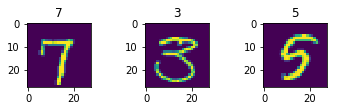

In [10]:
for i in range(6,9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    print(i)

Exapnd in one more direction for color channel grey

In [11]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [12]:
X_test.shape

(28000, 28, 28, 1)

# Preprocessing the images

It would be better to make the mean = 0 and variance = 1 for all the images

In [13]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    return (x-mean_px)/std_px

The labels can be replaced by a vector using one hot encoding

In [14]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)

In [15]:
num_classes = y_train.shape[1]

In [16]:
num_classes

10

# Let's construct a Neural Network now

In [17]:
seed = 43
np.random.seed(seed)

In [18]:
from keras.models import Sequential
from keras.layers.core import Lambda, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [19]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [20]:
import keras
keras.__version__

'2.0.5'

In [21]:
model.output_shape

(None, 10)

Now compile the network

In [22]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy']) 

In [23]:
from keras.preprocessing import image
gen = image.ImageDataGenerator

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state = 42)

In [26]:
batches = gen.flow(X_train, y_train, batch_size=64)

AttributeError: 'numpy.ndarray' object has no attribute 'data_format'

In [ ]:
val_batches = gen.flow(X_val,y_val,batch_size=64)

In [ ]:
X_train.shape